<a href="https://www.kaggle.com/code/sharonlogier/notebook8e5060d39d?scriptVersionId=226661322" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

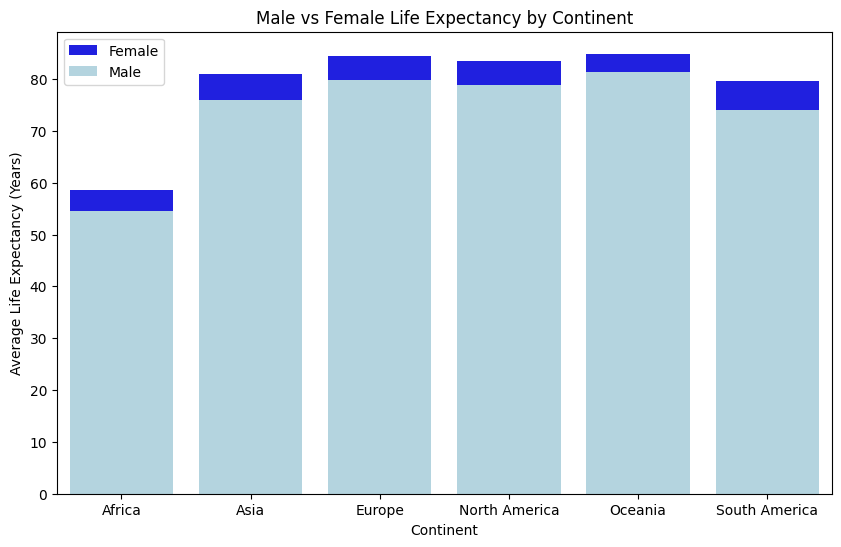

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/kaggle/input/life-expectancy/life_expectancy.csv")  # Replace with your actual path

# Rename columns to remove extra spaces for consistency
df.rename(columns={
    "Sum of Females  Life Expectancy": "Sum_Females_Life_Expectancy",
    "Sum of Life Expectancy  (both sexes)": "Sum_Life_Expectancy_Both_Sexes",
    "Sum of Males  Life Expectancy": "Sum_Males_Life_Expectancy"
}, inplace=True)

# Manually map countries to continents
continent_mapping = {
    "Chad": "Africa", "Nigeria": "Africa", "South Sudan": "Africa", "Lesotho": "Africa",
    "Central African Republic": "Africa", "United States": "North America", "Canada": "North America",
    "Brazil": "South America", "Argentina": "South America", "Germany": "Europe",
    "United Kingdom": "Europe", "France": "Europe", "China": "Asia", "India": "Asia",
    "Japan": "Asia", "Australia": "Oceania", "New Zealand": "Oceania"
}

# Assign continents
df["Continent"] = df["Country"].map(continent_mapping)

# Drop rows where continent is unknown
df.dropna(subset=["Continent"], inplace=True)

# Group by continent and calculate average life expectancy
continent_avg_life_expectancy = df.groupby("Continent")[["Sum_Females_Life_Expectancy", "Sum_Males_Life_Expectancy"]].mean().reset_index()

# Plot Male vs Female Life Expectancy by Continent
plt.figure(figsize=(10, 6))
sns.barplot(
    x="Continent",
    y="Sum_Females_Life_Expectancy",
    data=continent_avg_life_expectancy,
    color="blue",
    label="Female"
)
sns.barplot(
    x="Continent",
    y="Sum_Males_Life_Expectancy",
    data=continent_avg_life_expectancy,
    color="lightblue",
    label="Male"
)
plt.title("Male vs Female Life Expectancy by Continent")
plt.xlabel("Continent")
plt.ylabel("Average Life Expectancy (Years)")
plt.legend()
plt.show()


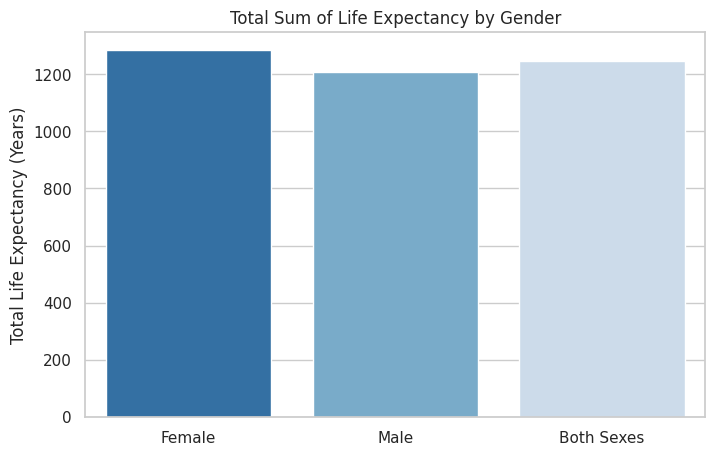

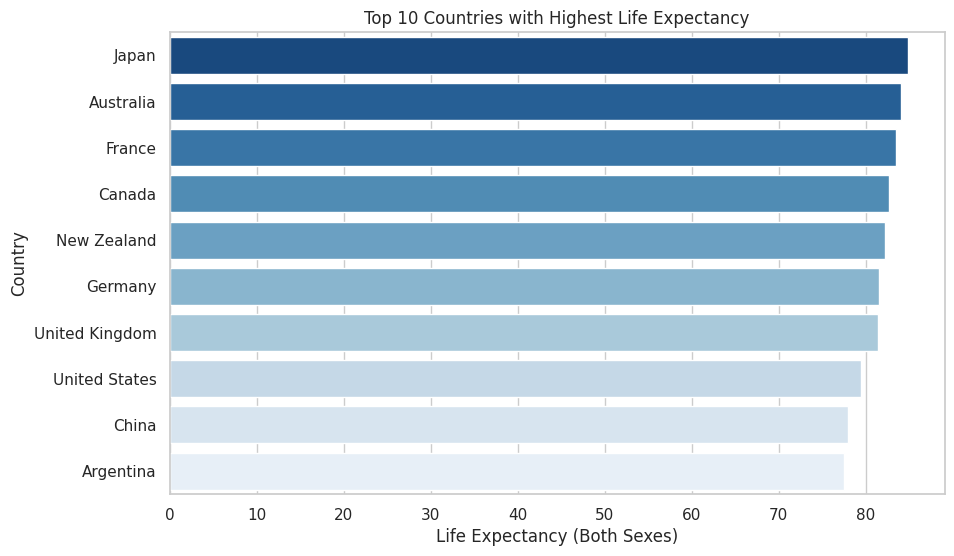

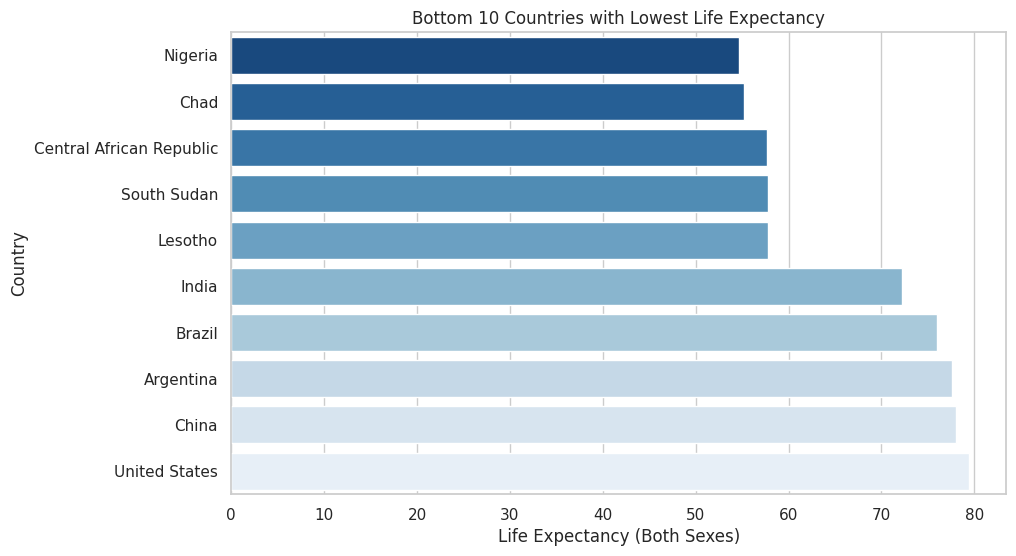

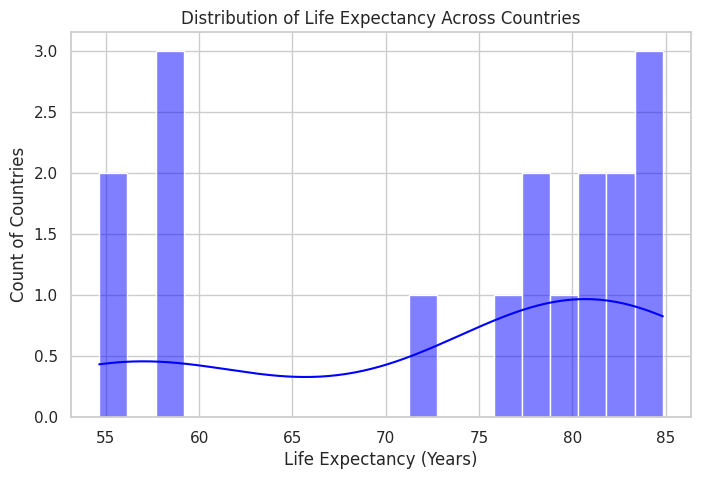

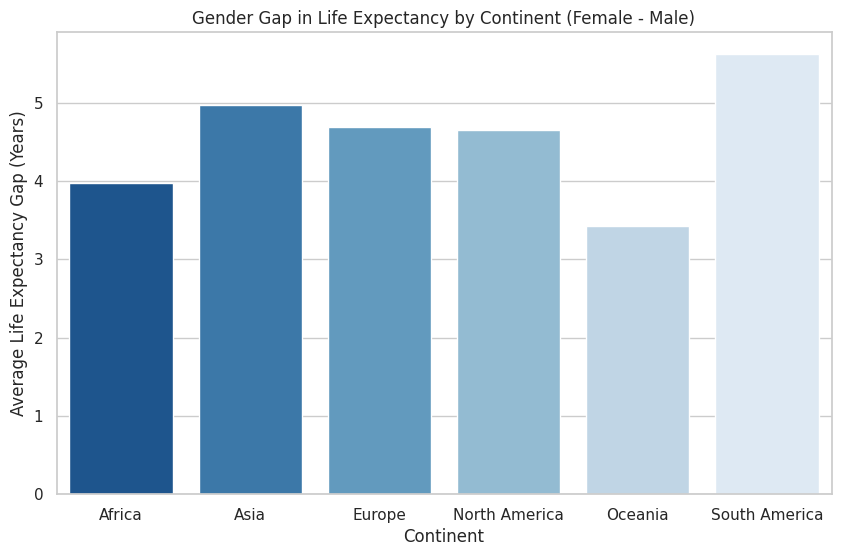

In [13]:
# Set seaborn style
sns.set(style="whitegrid")

# 1. Total Sum of Life Expectancy by Gender
plt.figure(figsize=(8, 5))
sns.barplot(
    x=["Female", "Male", "Both Sexes"],
    y=[df["Sum_Females_Life_Expectancy"].sum(), df["Sum_Males_Life_Expectancy"].sum(), df["Sum_Life_Expectancy_Both_Sexes"].sum()],
    palette="Blues_r"
)
plt.title("Total Sum of Life Expectancy by Gender")
plt.ylabel("Total Life Expectancy (Years)")
plt.show()

# 2. Top 10 Countries with Highest Life Expectancy
top_10_countries = df.nlargest(10, "Sum_Life_Expectancy_Both_Sexes")
plt.figure(figsize=(10, 6))
sns.barplot(
    y=top_10_countries["Country"], 
    x=top_10_countries["Sum_Life_Expectancy_Both_Sexes"], 
    palette="Blues_r"
)
plt.title("Top 10 Countries with Highest Life Expectancy")
plt.xlabel("Life Expectancy (Both Sexes)")
plt.ylabel("Country")
plt.show()

# 3. Bottom 10 Countries with Lowest Life Expectancy
bottom_10_countries = df.nsmallest(10, "Sum_Life_Expectancy_Both_Sexes")
plt.figure(figsize=(10, 6))
sns.barplot(
    y=bottom_10_countries["Country"], 
    x=bottom_10_countries["Sum_Life_Expectancy_Both_Sexes"], 
    palette="Blues_r"
)
plt.title("Bottom 10 Countries with Lowest Life Expectancy")
plt.xlabel("Life Expectancy (Both Sexes)")
plt.ylabel("Country")
plt.show()

# 4. Distribution of Life Expectancy Across Countries
plt.figure(figsize=(8, 5))
sns.histplot(df["Sum_Life_Expectancy_Both_Sexes"], bins=20, kde=True, color="blue")
plt.title("Distribution of Life Expectancy Across Countries")
plt.xlabel("Life Expectancy (Years)")
plt.ylabel("Count of Countries")
plt.show()

# 5. Male vs Female Life Expectancy by Continent (already done, so not repeated here)

# 6. Additional Creative Graph - Life Expectancy Gender Gap by Continent
df["Gender_Gap"] = df["Sum_Females_Life_Expectancy"] - df["Sum_Males_Life_Expectancy"]
continent_gender_gap = df.groupby("Continent")["Gender_Gap"].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(
    x="Continent",
    y="Gender_Gap",
    data=continent_gender_gap,
    palette="Blues_r"
)
plt.title("Gender Gap in Life Expectancy by Continent (Female - Male)")
plt.xlabel("Continent")
plt.ylabel("Average Life Expectancy Gap (Years)")
plt.show()


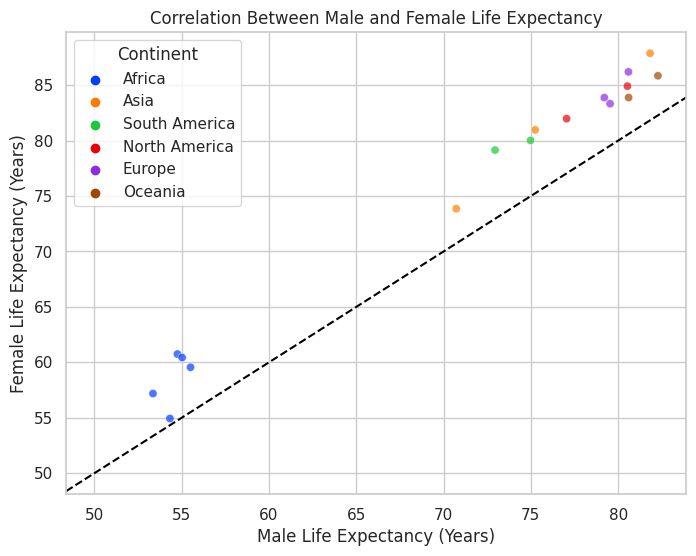

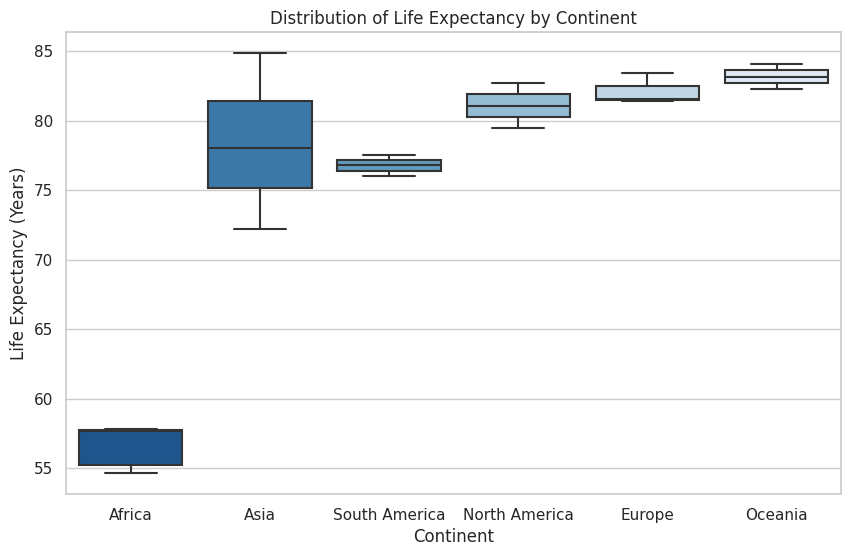

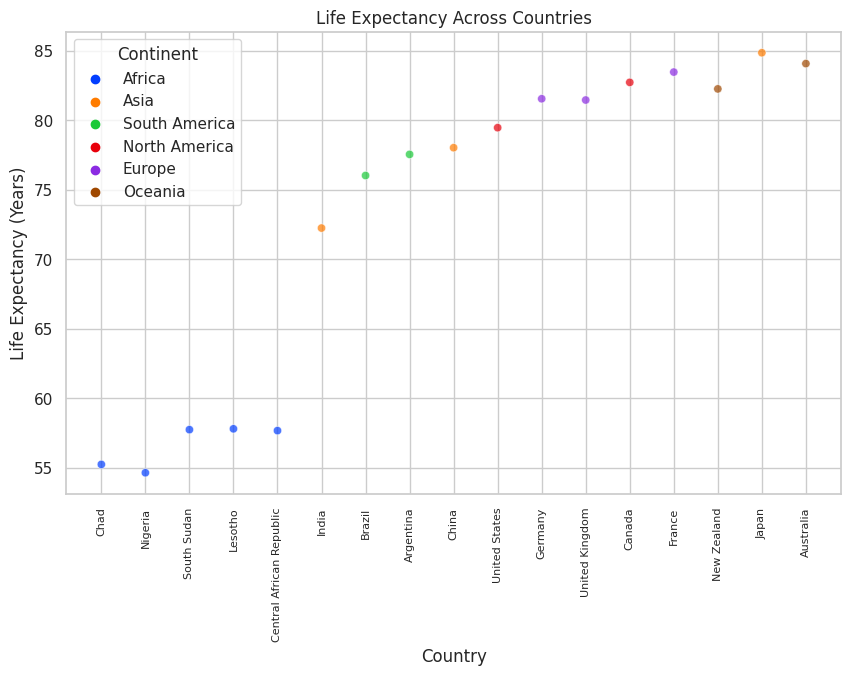

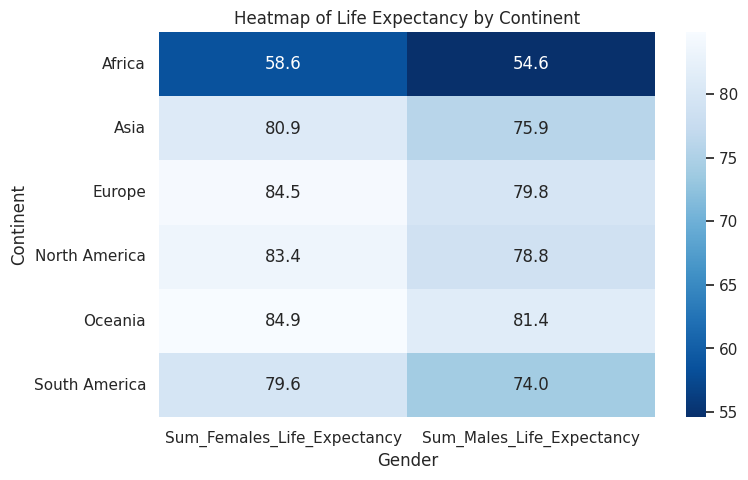

In [14]:
# 1. Correlation Between Male and Female Life Expectancy (Scatter Plot)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df["Sum_Males_Life_Expectancy"],
    y=df["Sum_Females_Life_Expectancy"],
    hue=df["Continent"],
    palette="bright",
    alpha=0.7
)
plt.title("Correlation Between Male and Female Life Expectancy")
plt.xlabel("Male Life Expectancy (Years)")
plt.ylabel("Female Life Expectancy (Years)")
plt.axline((50, 50), slope=1, color="black", linestyle="dashed")  # Line of equality
plt.legend(title="Continent")
plt.show()

# 2. Box Plot of Life Expectancy by Continent
plt.figure(figsize=(10, 6))
sns.boxplot(
    x="Continent",
    y="Sum_Life_Expectancy_Both_Sexes",
    data=df,
    palette="Blues_r"
)
plt.title("Distribution of Life Expectancy by Continent")
plt.xlabel("Continent")
plt.ylabel("Life Expectancy (Years)")
plt.show()

# 3. Life Expectancy Trends (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df["Country"],
    y=df["Sum_Life_Expectancy_Both_Sexes"],
    hue=df["Continent"],
    palette="bright",
    alpha=0.7
)
plt.xticks(rotation=90, fontsize=8)
plt.title("Life Expectancy Across Countries")
plt.xlabel("Country")
plt.ylabel("Life Expectancy (Years)")
plt.legend(title="Continent")
plt.show()

# 4. Heatmap of Life Expectancy by Continent
plt.figure(figsize=(8, 5))
continent_pivot = continent_avg_life_expectancy.set_index("Continent")
sns.heatmap(continent_pivot, annot=True, cmap="Blues_r", fmt=".1f")
plt.title("Heatmap of Life Expectancy by Continent")
plt.xlabel("Gender")
plt.ylabel("Continent")
plt.show()
